In [12]:
!pip install -r ./requirements.txt

  Using cached powerlaw-1.5-py3-none-any.whl.metadata (9.3 kB)
Using cached powerlaw-1.5-py3-none-any.whl (24 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
# import statements
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
import powerlaw

In [ ]:
!pwd

'/Users/evol-lab/Documents/Projects/graphdatamining'

In [6]:
# Load the graph
with open('src/data/graph/artifact_release_dependency_graph.gpickle', 'rb') as f:
    G = pickle.load(f)
# G = nx.read_gpickle("artifact_release_dependency_graph.gpickle")
print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph loaded: 1397519 nodes, 20934596 edges


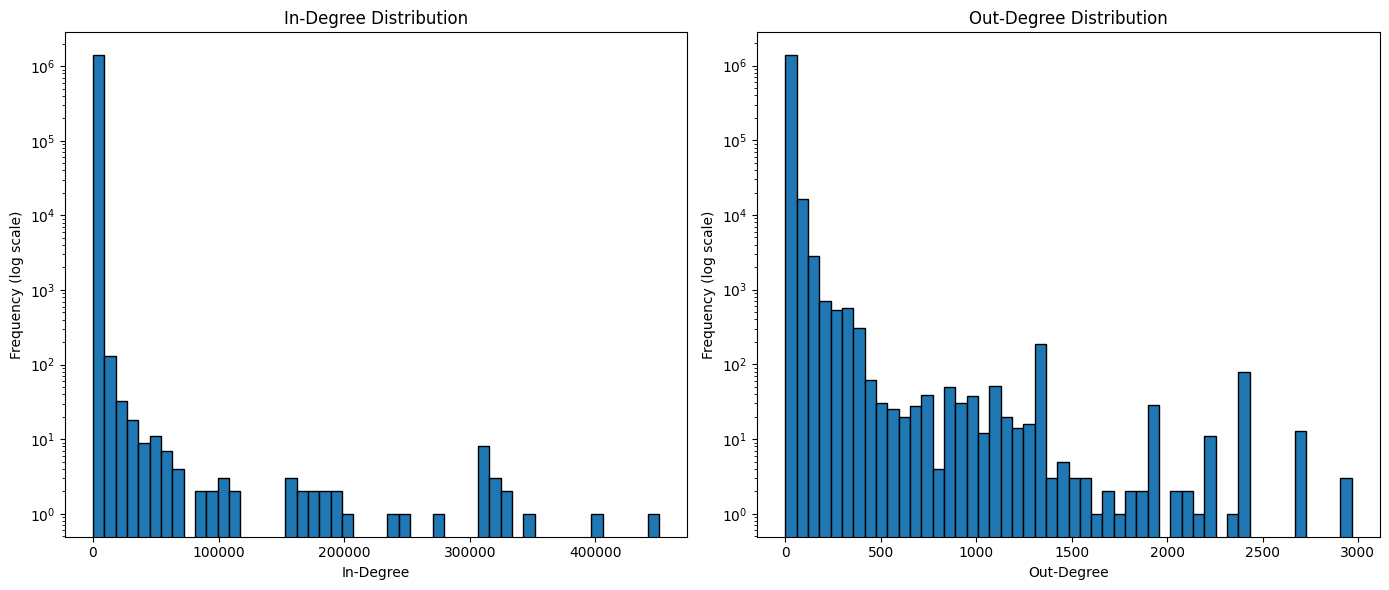

In [9]:

# Get degree sequences
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]
total_degrees = [d for n, d in G.degree()]

# Plot histogram of in-degree and out-degree
plt.figure(figsize=(14, 6))

# In-Degree Distribution
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=50, edgecolor='black', log=True)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency (log scale)")

# Out-Degree Distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=50, edgecolor='black', log=True)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.savefig("degree_distributions.png", dpi=600)
plt.show()

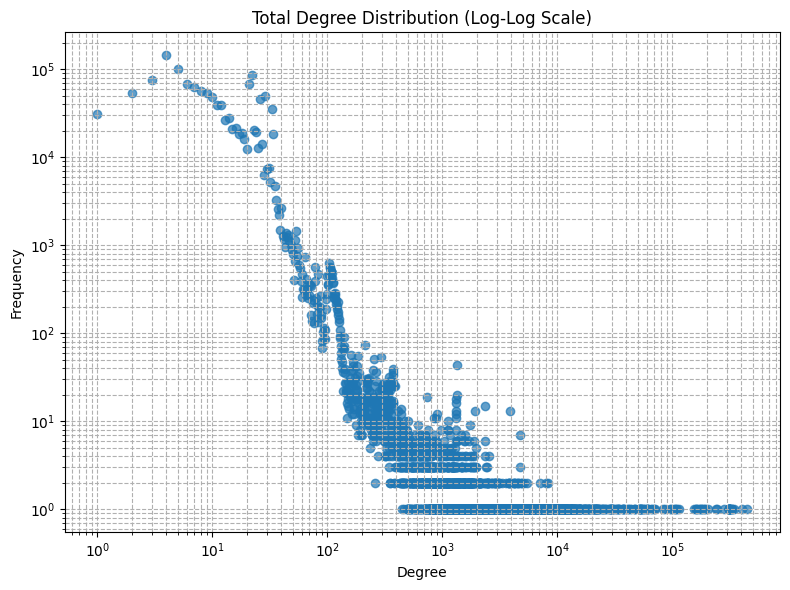

In [10]:
# Total degree counts
degree_counts = np.bincount(total_degrees)
degrees = np.arange(len(degree_counts))
nonzero = degree_counts > 0

plt.figure(figsize=(8, 6))
plt.scatter(degrees[nonzero], degree_counts[nonzero], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title("Total Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.savefig("loglog_degree_distribution.png", dpi=600)
plt.show()

### Degree Distribution with Power-law fit

In [ ]:
# Get total degree sequence
degree_sequence = [d for n, d in G.degree()]
degree_sequence = [d for d in degree_sequence if d > 0]  # remove zeros (optional)

# Fit the power-law
fit = powerlaw.Fit(degree_sequence, discrete=True)
print(f"Power-law alpha (slope): {fit.power_law.alpha:.4f}")
print(f"Power-law xmin (cutoff): {fit.power_law.xmin}")

# Compare power-law vs. other distributions
R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"Comparison: R = {R:.4f}, p = {p:.4f}")
if R > 0 and p < 0.05:
    print("Power-law is a better fit (significant)")
else:
    print("Power-law may not be the best fit")


# Plot empirical data + fitted power-law
plt.figure(figsize=(8, 6))
fit.plot_pdf(color='b', linewidth=2, label='Empirical data')
fit.power_law.plot_pdf(color='r', linestyle='--', label='Fitted power-law')

plt.title("Degree Distribution with Power-Law Fit")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
# plt.savefig("fig/powerlaw_fit.png", dpi=300)
plt.show()

Calculating best minimal value for power law fit
